# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

<AxesSubplot:>

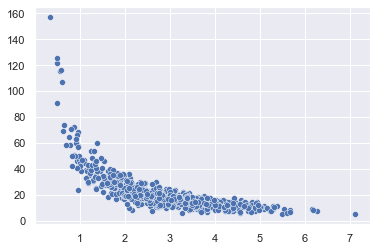

In [8]:
%matplotlib inline
from pylab import *
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

sns.scatterplot(x=pageSpeeds, y=purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [47]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)


p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
p4 = np.poly1d(np.polyfit(x, y, 4))
p5 = np.poly1d(np.polyfit(x, y, 5))
p10 = np.poly1d(np.polyfit(x, y, 10))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

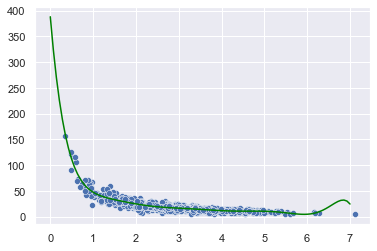

In [48]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
sns.scatterplot(x=x, y=y)
#plt.plot(xp, p4(xp), c='r')
plt.plot(xp, p10(xp), c='green')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [49]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p10(x))

print(r2)


0.8832172356257308


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?